In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
from sklearn.metrics.pairwise import euclidean_distances
np.set_printoptions(suppress = True) # to avoid the number in exponenet form

In [48]:
data = pd.read_excel('pca data.xlsx')

In [49]:
data

,AccelSec,TopSpeed_KmH,Range_Km
0,4.6,233,450
1,10.0,160,270
2,4.7,210,400
3,6.8,180,360
4,9.5,145,170
5,2.8,250,610
6,9.6,150,190
7,8.1,150,275
8,5.6,225,310
9,6.3,180,400


## Step1 : Standardize

In [50]:
sc = StandardScaler()
data_s = sc.fit_transform(data)
data_s = pd.DataFrame(data_s,columns=data.columns)
data_s

,AccelSec,TopSpeed_KmH,Range_Km
0,-0.998198,1.540888,0.954850
1,1.408172,-0.690954,-0.631670
2,-0.953636,0.837705,0.514150
3,-0.017825,-0.079490,0.161590
4,1.185360,-1.149551,-1.513071
5,-1.800321,2.060632,2.365091
6,1.229922,-0.996686,-1.336791
7,0.561486,-0.996686,-0.587600
8,-0.552574,1.296303,-0.279110
9,-0.240637,-0.079490,0.514150


## Step2 : Covariance matrix

In [51]:
cov_mat = np.cov(data_s.T)
cov_mat.shape

(3, 3)

## Step3: eigen values and eigen vectors of cov. matrix

In [52]:
eig_val , eig_vec = np.linalg.eig(cov_mat)


In [53]:
eig_val

array([2.89857911, 0.1295811 , 0.18612551])

In [54]:
eig_vec

array([[ 0.58317464, -0.81091338, -0.04823714],
       [-0.57378162, -0.36915023, -0.73109696],
       [-0.57504956, -0.45403479,  0.68056625]])

In [55]:
pca.components_.T

array([[-0.58317464,  0.04823714,  0.81091338],
       [ 0.57378162,  0.73109696,  0.36915023],
       [ 0.57504956, -0.68056625,  0.45403479]])

## Step4 : sort the eigen values in Desc order

In [56]:
eig_val1 = eig_val[0]
eig_val2 = eig_val[2]
eig_val3 = eig_val[1]


In [57]:
eig_vec1 = eig_vec[:,0]
eig_vec2 = eig_vec[:,2]
eig_vec3 = eig_vec[:,1]


## Step5 : Find out PCs

In [58]:
pcs_data = pd.DataFrame(columns = ['PC1','PC2','PC3'])

In [59]:
pcs_data['PC1'] = data_s.dot(eig_vec1)
pcs_data['PC2'] = data_s.dot(eig_vec2)
pcs_data['PC3'] = data_s.dot(eig_vec3)

In [60]:
pcs_data.corr()

,PC1,PC2,PC3
PC1,1.000000e+00,3.616858e-16,6.469769e-17
PC2,3.616858e-16,1.000000e+00,6.319077e-16
PC3,6.469769e-17,6.319077e-16,1.000000e+00


## Step6 : Find the explained Variance of all PCs

In [61]:
evr_val1 = (eig_val1/(eig_val1+eig_val2+eig_val3))*100

In [62]:
evr_val2 = (eig_val2/np.sum(eig_val))*100

In [63]:
evr_val3 = (eig_val3/np.sum(eig_val))*100

In [64]:
print('evr_val1',evr_val1,'\n','evr_val2',evr_val2,'\n','evr_val3',evr_val3)

evr_val1 90.17801672776879 
 evr_val2 5.790571365427058 
 evr_val3 4.031411906804149


In [65]:
evr_val1+evr_val2+evr_val3

100.0

<Axes: xlabel='PC1', ylabel='PC2'>

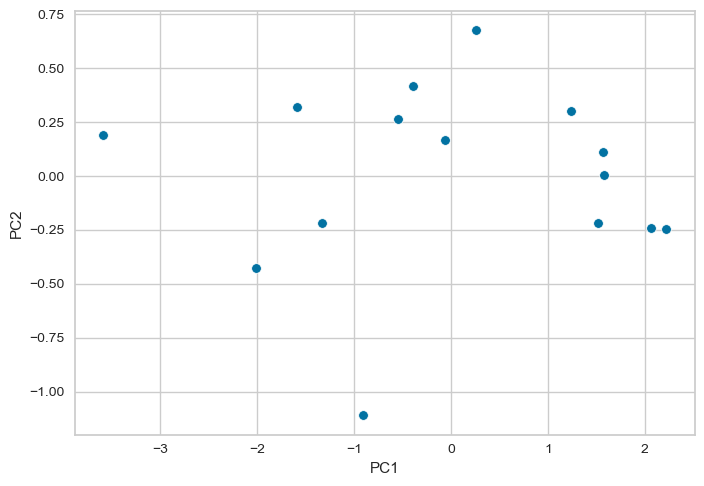

In [66]:
sns.scatterplot(x=pcs_data['PC1'],y=pcs_data['PC2'])

## Now lets use PCA function from Sklearn

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(data_s)
pcs = pd.DataFrame(pcs,columns=pcs_data.columns)
pcs

,PC1,PC2,PC3
0,2.015343,0.428549,0.192902
1,-1.580909,-0.007335,0.600040
2,1.332458,0.216530,-0.230635
3,0.057707,-0.168948,0.029569
4,-2.220954,0.246490,-0.150120
5,3.592299,-0.189922,0.374612
6,-2.057860,0.240429,0.022484
7,-1.237224,-0.301688,-0.179401
8,0.905540,1.111021,-0.096285
9,0.390385,-0.419636,0.008962


In [69]:
pcs_data

,PC1,PC2,PC3
0,-2.015343,-0.428549,-0.192902
1,1.580909,0.007335,-0.600040
2,-1.332458,-0.216530,0.230635
3,-0.057707,0.168948,-0.029569
4,2.220954,-0.246490,0.150120
5,-3.592299,0.189922,-0.374612
6,2.057860,-0.240429,-0.022484
7,1.237224,0.301688,0.179401
8,-0.905540,-1.111021,0.096285
9,-0.390385,0.419636,-0.008962


In [70]:
# Eigen Values 
pca.explained_variance_

array([2.89857911, 0.18612551, 0.1295811 ])

In [71]:
# Eigen Vectors
pca.components_

array([[-0.58317464,  0.57378162,  0.57504956],
       [ 0.04823714,  0.73109696, -0.68056625],
       [ 0.81091338,  0.36915023,  0.45403479]])

In [72]:
eig_vec

array([[ 0.58317464, -0.81091338, -0.04823714],
       [-0.57378162, -0.36915023, -0.73109696],
       [-0.57504956, -0.45403479,  0.68056625]])

In [73]:
eig_val

array([2.89857911, 0.1295811 , 0.18612551])

In [74]:
# explained variance ratio
pca.explained_variance_ratio_

array([0.90178017, 0.05790571, 0.04031412])

In [75]:
np.cumsum(pca.explained_variance_ratio_)  # for total percentage variance 

array([0.90178017, 0.95968588, 1.        ])

## LDA

In [76]:
iris= sns.load_dataset('iris')

In [77]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [78]:
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

In [79]:
for i in iris.columns:
    if i != 'species':
        iris[i] = sc.fit_transform(pd.DataFrame(iris[i]))

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [83]:
lda = LinearDiscriminantAnalysis(solver='eigen')
# LDA returns components min(classes-1 , no. of features)
lds = lda.fit_transform(X = iris.iloc[:,:4],y = iris['species'])

In [84]:
lds = pd.DataFrame(lds,columns=['LD1','LD2'])

In [85]:
lds

,LD1,LD2
0,8.143648,0.303471
1,7.201062,-0.794647
2,7.565869,-0.268079
3,6.882372,-0.677440
4,8.214873,0.519686
...,...,...
145,-5.702315,1.694750
146,-5.232150,-0.367165
147,-5.018176,0.829477
148,-5.945905,2.368899


In [86]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [87]:
lda.scalings_

array([[ 0.69143572,  0.02009348, -2.64442999, -0.25493982],
       [ 0.67335953,  0.94983812,  0.98873139, -0.63854513],
       [-3.91213972, -1.65627234,  4.30903908, -3.17779997],
       [-2.15676253,  2.17880821, -1.67074795,  3.07659459]])

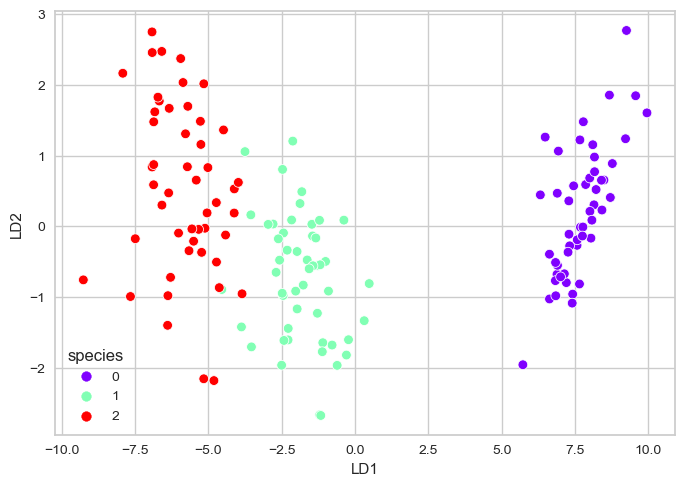

In [90]:
sns.scatterplot(x=lds['LD1'],y=lds['LD2'],hue=iris['species'],palette='rainbow');

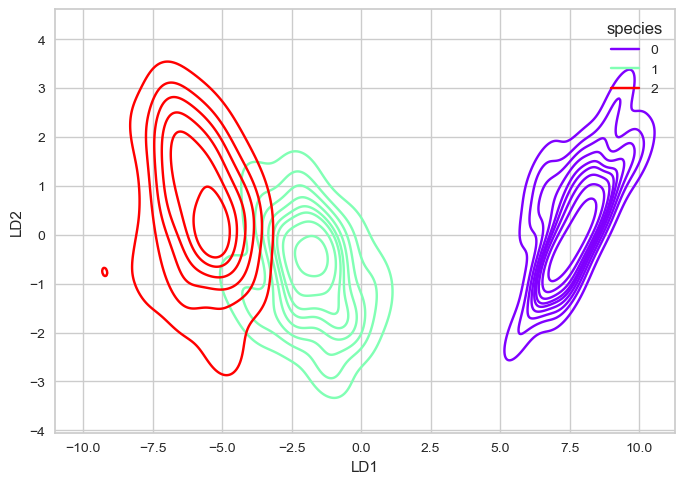

In [91]:
sns.kdeplot(x=lds['LD1'],y=lds['LD2'],hue=iris['species'],palette='rainbow');

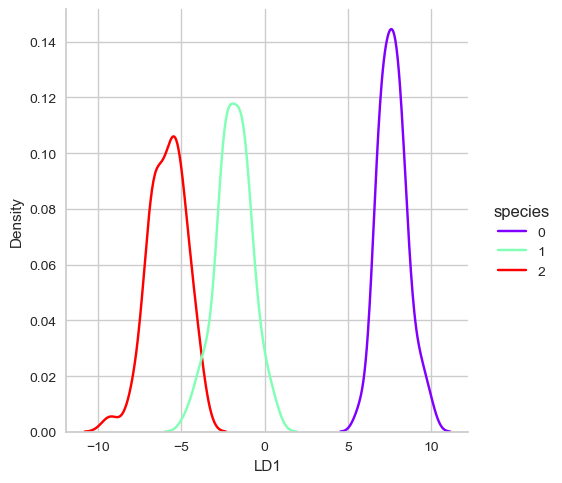

In [93]:
sns.displot(x=lds['LD1'],hue=iris['species'],palette='rainbow',kind='kde');